In [1]:
import cartopy.crs as ccrs
import cartopy
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import pandas as pd
import geopandas 
import osmnx as ox
import os
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12] # to make the default figures larger

In [2]:
data = geopandas.read_file("https://unpkg.com/sentinel-2-grid/data/grid.json")
data

name     id   epsg                                            mgrsRef   
0      01CCV  01CCV  32701  -72.01265627 177.18928449 -72.077536527 -179.9...  \
1      01CDH  01CDH  32701  -82.796942202 175.83834491 -82.852560274 -177 ...   
2      01CDJ  01CDJ  32701  -81.907342379 176.62455327 -81.956740238 -177 ...   
3      01CDK  01CDK  32701  -81.01647427 177.25448324 -81.060880975 -177 -...   
4      01CDL  01CDL  32701  -80.124666236 177.77028412 -80.164978249 -177 ...   
...      ...    ...    ...                                                ...   
56681  60XWM  60XWM  32660  78.373025672 177 78.339036507 -178.56398641 77...   
56682  60XWN  60XWN  32660  79.269027864 177 79.2321368 -178.2002305 78.33...   
56683  60XWP  60XWP  32660  80.164978249 177 80.124666236 -177.77028412 79...   
56684  60XWQ  60XWQ  32660  81.060880975 177 81.01647427 -177.25448324 80....   
56685  60XWR  60XWR  32660  81.956740238 177 81.907342379 -176.62455327 81...   

                                                  utmWkt   
0      MULTIPOLYGON(((300000 2000020,300000 1890220,4...  \
1      MULTIPOLYGON(((399960 800020,399960 690220,509...   
2      MULTIPOLYGON(((399960 900040,399960 790240,509...   
3      MULTIPOLYGON(((399960 1000000,399960 890200,50...   
4      MULTIPOLYGON(((399960 1100020,399960 990220,50...   
...                                                  ...   
56681  MULTIPOLYGON(((499980 8700000,499980 8590200,6...   
56682  MULTIPOLYGON(((499980 8800020,499980 8690220,6...   
56683  MULTIPOLYGON(((499980 8900040,499980 8790240,6...   
56684  MULTIPOLYGON(((499980 9000000,499980 8890200,6...   
56685  MULTIPOLYGON(((499980 9100020,499980 8990220,6...   

                                                   llWkt   
0      MULTIPOLYGON(((177.189340361676 -72.0124778858...  \
1      MULTIPOLYGON(((175.835686552199 -82.7967201119...   
2      MULTIPOLYGON(((176.62230379644 -81.90694685766...   
3      MULTIPOLYGON(((177.252200236163 -81.0164388283...   
4      MULTIPOLYGON(((177.768297510956 -80.1244556090...   
...                                                  ...   
56681  MULTIPOLYGON(((176.999111056498 78.37302567082...   
56682  MULTIPOLYGON(((176.99903781753 79.269207058016...   
56683  MULTIPOLYGON(((176.998951147317 80.16533661752...   
56684  MULTIPOLYGON(((176.998847076363 81.06088097318...   
56685  MULTIPOLYGON(((176.998719645733 81.95691940366...   

                                                geometry  
0      GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 -7...  
1      GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 -8...  
2      GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 -8...  
3      GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 -8...  
4      GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 -8...  
...                                                  ...  
56681  GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 77...  
56682  GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 78...  
56683  GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 79...  
56684  GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 80...  
56685  GEOMETRYCOLLECTION Z (POLYGON Z ((180.00000 80...  

[56686 rows x 7 columns]

In [3]:
df = data[((data['name'].str[:2] == '29') | (data['name'].str[:2] == '30')| (data['name'].str[:2] == '31')| (data['name'].str[:2] == '32')| (data['name'].str[:2] == '33')| (data['name'].str[:2] == '34'))
          &((data['name'].str[2:3] == 'S') | (data['name'].str[2:3] == 'T')| (data['name'].str[2:3] == 'U')| (data['name'].str[2:3] == 'V'))] 


In [4]:
newdf = df['mgrsRef']
namesdf = df['name'].to_frame()
newdf.to_frame()
newdf = newdf.apply(lambda x: pd.Series(str(x).split(" ")))
newdf['Names'] = namesdf
newdf

0              1             2              3             4   
27280  36.998314508  -12.371077915  37.024915488   -11.24836928  36.124095832  \
27281  37.898106377    -12.4117454   37.92558175  -11.275528236  37.024915488   
27282  38.797721547  -12.454264374  38.826092537  -11.303925036   37.92558175   
27283  39.697156754  -12.498725873  39.726445843  -11.333620684  38.826092537   
27284  32.496818931  -12.192739789  32.519327665  -11.129284451  31.617775075   
...             ...            ...           ...            ...           ...   
32189  60.423898796   22.816271214  60.386806781   24.629341674  59.490625599   
32190  61.321242625   22.867983666  61.282767365   24.732459422  60.386806781   
32191  62.218439737   22.923210847  62.178500106    24.84256571  61.282767365   
32192   63.11548987   22.982302005  63.073996603   24.960352003  62.178500106   
32193  64.012392499   23.045654581  63.969247075   25.086604661  63.073996603   

                   5             6              7  Names  
27280  -11.222391385  36.098349195  -12.332177171  29SKA  
27281   -11.24836928  36.998314508  -12.371077915  29SKB  
27282  -11.275528236  37.898106377    -12.4117454  29SKC  
27283  -11.303925036  38.797721547  -12.454264374  29SKD  
27284  -11.108485898  31.596035671  -12.161588875  29SKR  
...              ...           ...            ...    ...  
32189   24.532602041  59.526408304   22.767765366  34VFM  
32190   24.629341674  60.423898796   22.816271214  34VFN  
32191   24.732459422  61.321242625   22.867983666  34VFP  
32192    24.84256571  62.218439737   22.923210847  34VFQ  
32193   24.960352003   63.11548987   22.982302005  34VFR  

[1087 rows x 9 columns]

In [5]:
newdf[newdf['Names'] == '29SKA']

0              1             2             3             4   
27280  36.998314508  -12.371077915  37.024915488  -11.24836928  36.124095832  \

                   5             6              7  Names  
27280  -11.222391385  36.098349195  -12.332177171  29SKA

In [6]:
EmptyList = []

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29\iid_test_split"):
    string = os.path.basename(dirname)
    EmptyList.append(newdf[newdf['Names'] == string])

PredictedTiles = pd.concat(EmptyList) 
PredictedTiles


0              1             2              3             4   
27310  39.749907519             -9  39.744039563  -7.8328481247   38.84313441  \
27318   38.84313441  -7.8477123854  38.826092537  -6.6960749644   37.92558175   
27326   37.92558175  -6.7244717638  37.898106377     -5.5882546  36.998314508   
27355  40.650856516             -9   40.64479965  -7.8173003773  39.744039563   
27364   40.64479965  -7.8173003773  40.626639727   -6.635319213  39.726445843   
...             ...            ...           ...            ...           ...   
32100  43.346200009   22.233812138  43.326246335   23.466782049  42.426541772   
32101  44.246370915   22.252477052  44.225784263   23.504063776  43.326246335   
32105  47.845561252   22.336590975   47.82223562   23.672054778   46.92338122   
32161  59.490625599   17.467397959  59.526408304   19.232234634  58.628771049   
32192   63.11548987   22.982302005  63.073996603   24.960352003  62.178500106   

                   5             6              7  Names  
27310  -7.8477123854  38.848818252             -9  29SND  
27318  -6.7244717638   37.94208532  -7.8619260681  29SPC  
27326  -5.6289220847  37.024915488  -6.7516307199  29SQB  
27355  -7.8328481247  39.749907519             -9  29TNE  
27364  -6.6663793162  39.744039563  -7.8328481247  29TPE  
...              ...           ...            ...    ...  
32100   23.431182352  42.445880705   22.215990056  34TFN  
32101   23.466782049  43.346200009   22.233812138  34TFP  
32105   23.627001398  46.945988324   22.314030877  34TFT  
32161   19.277806753  58.594230092   17.558300367  34VCL  
32192    24.84256571  62.218439737   22.923210847  34VFQ  

[82 rows x 9 columns]

In [7]:

# Convert it to a geoDataFrame
gdf = geopandas.GeoDataFrame(
    PredictedTiles, geometry=geopandas.points_from_xy(PredictedTiles[3], PredictedTiles[4]))
# Set the projection system
gdf = gdf.set_crs(epsg=4326)

#print(gdf)

In [8]:

TileScores_DF = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileScore")
                
decimals = 3    
TileScores_DF['Rounded_Scores'] = TileScores_DF['EarthNet Score'].apply(lambda x: round(x, decimals))

TileScores_DF[TileScores_DF['Tile'] == '29SND']['Rounded_Scores'].item()


0.341

In [9]:
CheckScore_DF = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\ScorePerSample.csv")
TileNames_DF = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TilesMeanVarScore.csv")
ListTileNames = TileNames_DF['TileName'].values.tolist()
EmptyL1 = []

for names in ListTileNames:
    TileDF = CheckScore_DF[CheckScore_DF['Sample'].str[0:5] == names]
    Smaller30 = TileDF[TileDF['EarthNet Score'] < 0.3]
    Bigger32 = TileDF[TileDF['EarthNet Score'] > 0.32]
    Inbetween = TileDF[(TileDF['EarthNet Score'] >= 0.3)&(TileDF['EarthNet Score'] <= 0.32)] 

    ListPercentages = [names,100*(len(Smaller30)/len(TileDF)),100*(len(Inbetween)/len(TileDF)),100*(len(Bigger32)/len(TileDF))]
    EmptyL1.append(ListPercentages)

DFfinalPercentages = pd.DataFrame(EmptyL1,columns=['TileName','Percentage<30%','Percentage>=30% & <=32%','Percentage>32%']).drop_duplicates()
DFfinalPercentages



TileName  Percentage<30%  Percentage>=30% & <=32%  Percentage>32%
0     29SND       10.831234                 8.816121       80.352645
1     29SPC       19.545455                12.272727       68.181818
2     29SQB       18.584071                 9.734513       71.681416
3     29TNE        0.000000                 6.024096       93.975904
4     29TPE        8.474576                16.949153       74.576271
..      ...             ...                      ...             ...
77    34TFN       13.793103                17.241379       68.965517
78    34TFP       33.333333                20.000000       46.666667
79    34TFT       15.789474                26.315789       57.894737
80    34VCL       14.285714                14.285714       71.428571
81    34VFQ        0.000000                 4.166667       95.833333

[82 rows x 4 columns]

In [10]:
DFfinalPercentages.loc[DFfinalPercentages['TileName'] == '29SND'].iloc[0][1:]

Percentage<30%             10.831234
Percentage>=30% & <=32%     8.816121
Percentage>32%             80.352645
Name: 0, dtype: object

In [11]:
def absolute_value(x):
    if x >= 0:
        return x
    else:
        return -x
    
bound = df[df['name'] == '29SND']['geometry'].bounds.values

X_value = absolute_value(bound[:,2]-bound[:,0])
Y_value = absolute_value(bound[:,3]-bound[:,1])



In [12]:
df[df['name'] == '30TYR']['geometry'].centroid

C:\Users\jeroe\AppData\Local\Temp\ipykernel_2680\930922451.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df[df['name'] == '30TYR']['geometry'].centroid


28324    POINT (0.26291 45.51207)
dtype: geometry

In [13]:
bound = df[df['name'] == '30TYR']['geometry'].bounds
bound

minx       miny      maxx       maxy
28324 -0.461293  44.997588  0.999321  46.024365

In [14]:
bound1 = df[df['name'] == '33VVG']['geometry'].bounds
bound1

minx       miny       maxx       maxy
31204  13.182993  59.438616  15.177321  60.436339

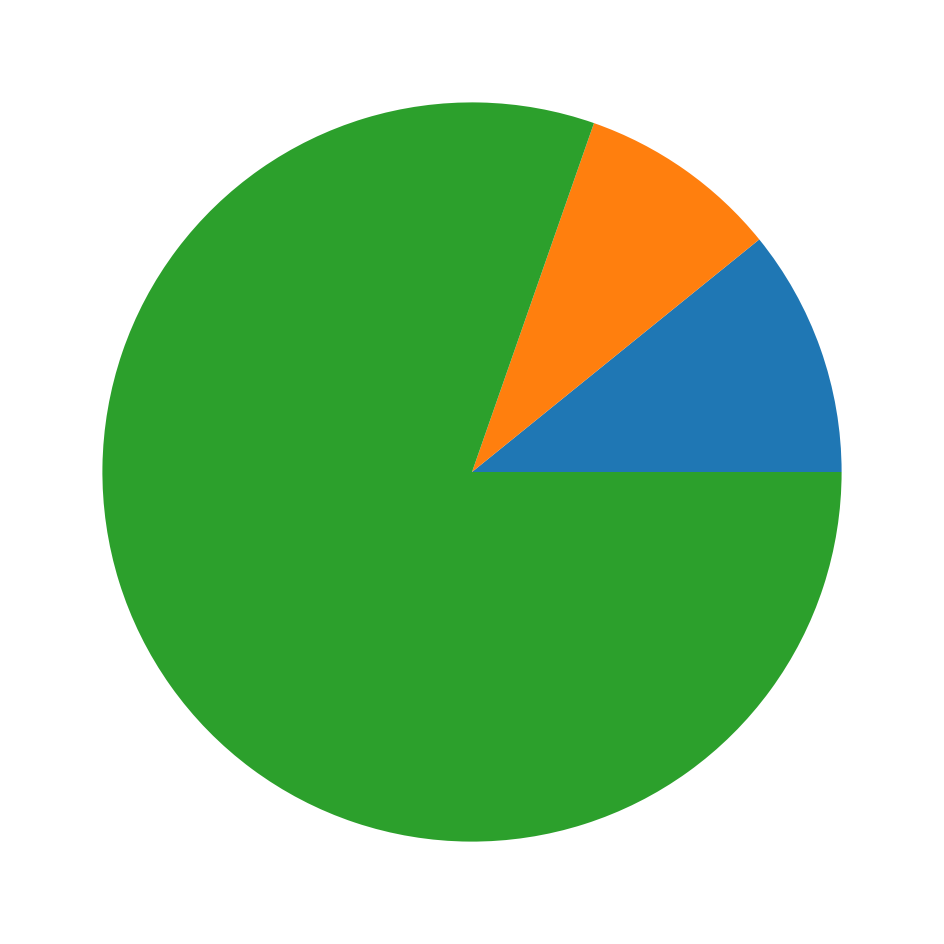

In [15]:

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
# Creating plot
plt.pie(DFfinalPercentages.iloc[0,1:])
 
# show plot
plt.show()

In [16]:
from matplotlib import colors
from matplotlib import cm
import matplotlib as matplotlib

def color_map_color(value, cmap_name='RdYlGn', vmin=0.24, vmax=0.4):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

plt.figure()

extent = [-15, 25, 35, 65]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic()})
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0.24,vmax=0.4),cmap='RdYlGn'),ax=ax,fraction=0.025, pad=0.025).set_label('EarthNet Score per Tile')
ax.set_extent(extent)

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29\iid_test_split"):
    
    string = os.path.basename(dirname)
    TScore =  TileScores_DF[TileScores_DF['Tile'] == string]['Rounded_Scores'].item()

    df[df['name'] == string].plot(ax=ax, markersize=1,color=color_map_color(TScore),transform=ccrs.Geodetic())
        

ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)
ax.stock_img()
ax.background_img(name='BlueMarble',resolution='high')

C:\Users\jeroe\AppData\Local\Temp\ipykernel_30576\3128110328.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\ipykernel_30576\3128110328.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\ipykernel_30576\3128110328.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local

<Figure size 1600x1200 with 0 Axes>

In [16]:
print(bound1.iloc[0][0].round(3), bound1.iloc[0][1].round(3), bound1.iloc[0][2].round(3), bound1.iloc[0][3].round(3))

13.183 59.439 15.177 60.436


In [26]:
bbox_of_interest = [bound1.iloc[0][0].round(3), bound1.iloc[0][1].round(3), bound1.iloc[0][2].round(3), bound1.iloc[0][3].round(3)]

import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

search = catalog.search(
    collections=["esa-worldcover"],
    bbox=bbox_of_interest,
)

items = list(search.get_items())
items

[<Item id=ESA_WorldCover_10m_2021_v200_N60E015>,
 <Item id=ESA_WorldCover_10m_2021_v200_N60E012>,
 <Item id=ESA_WorldCover_10m_2021_v200_N57E015>,
 <Item id=ESA_WorldCover_10m_2021_v200_N57E012>,
 <Item id=ESA_WorldCover_10m_2020_v100_N60E015>,
 <Item id=ESA_WorldCover_10m_2020_v100_N60E012>,
 <Item id=ESA_WorldCover_10m_2020_v100_N57E015>,
 <Item id=ESA_WorldCover_10m_2020_v100_N57E012>]

In [27]:
import rich.table

# Assets
t_assets = rich.table.Table("Key", "Value")
for key, asset in items[0].assets.items():
    t_assets.add_row(key, asset.title)
t_assets

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key              ┃ Value                             ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ map              │ Land Cover Classes                │
│ input_quality    │ Classification Input Data Quality │
│ tilejson         │ TileJSON with default rendering   │
│ rendered_preview │ Rendered preview                  │
└──────────────────┴───────────────────────────────────┘

In [28]:
# Metadata
t_metadata = rich.table.Table("Key", "Value")
for k, v in sorted(items[0].properties.items()):
    t_metadata.add_row(k, str(v))
t_metadata

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key                            ┃ Value                                              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ created                        │ 2023-04-06T16:39:39.256009Z                        │
│ datetime                       │ None                                               │
│ description                    │ ESA WorldCover product at 10m resolution           │
│ end_datetime                   │ 2021-12-31T23:59:59Z                               │
│ esa_worldcover:product_tile    │ N60E015                                            │
│ esa_worldcover:product_version │ 2.0.0                                              │
│ grid:code                      │ ESAWORLDCOVER-N60E015                              │
│ instruments                    │ ['c-sar', 'msi']                                   │
│ mission                        │ sentinel-1, sentinel-2                             │
│ platform                       │ sentinel-1a, sentinel-1b, sentinel-2a, sentinel-2b │
│ proj:epsg                      │ 4326                                               │
│ start_datetime                 │ 2021-01-01T00:00:00Z                               │
└────────────────────────────────┴────────────────────────────────────────────────────┘

In [29]:
class_list = items[0].assets["map"].extra_fields["classification:classes"]
classmap = {
    c["value"]: {"description": c["description"], "hex": c["color-hint"]}
    for c in class_list
}

t = rich.table.Table("Value", "Description", "Hex Color")
for k, v in classmap.items():
    t.add_row(str(k), v["description"], v["hex"])
t

┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Value ┃ Description              ┃ Hex Color ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ 10    │ Tree cover               │ 006400    │
│ 20    │ Shrubland                │ FFBB22    │
│ 30    │ Grassland                │ FFFF4C    │
│ 40    │ Cropland                 │ F096FF    │
│ 50    │ Built-up                 │ FA0000    │
│ 60    │ Bare / sparse vegetation │ B4B4B4    │
│ 70    │ Snow and ice             │ F0F0F0    │
│ 80    │ Permanent water bodies   │ 0064C8    │
│ 90    │ Herbaceous wetland       │ 0096A0    │
│ 95    │ Mangroves                │ 00CF75    │
│ 100   │ Moss and lichen          │ FAE6A0    │
└───────┴──────────────────────────┴───────────┘

In [51]:
import matplotlib.colors

colors = ["#000000" for r in range(256)]
for key, value in classmap.items():
    colors[int(key)] = f"#{value['hex']}"
cmap = matplotlib.colors.ListedColormap(colors)

# sequences needed for an informative colorbar
values = [key for key in classmap]
boundaries = [(values[i + 1] + values[i]) / 2 for i in range(len(values) - 1)]
boundaries = [0] + boundaries + [255]
ticks = [(boundaries[i + 1] + boundaries[i]) / 2 for i in range(len(boundaries) - 1)]
tick_labels = [value["description"] for value in classmap.values()]

In [46]:
import odc.stac

ds = odc.stac.load(items, crs="EPSG:4326", resolution=0.0001, bbox=bbox_of_interest)
map_data = ds["map"].isel(time=-1).load()
map_data

<xarray.DataArray 'map' (latitude: 9970, longitude: 19940)>
array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)
Coordinates:
  * latitude     (latitude) float64 60.44 60.44 60.44 ... 59.44 59.44 59.44
  * longitude    (longitude) float64 13.18 13.18 13.18 ... 15.18 15.18 15.18
    spatial_ref  int32 4326
    time         datetime64[ns] 2021-01-01
Attributes:
    nodata:   0

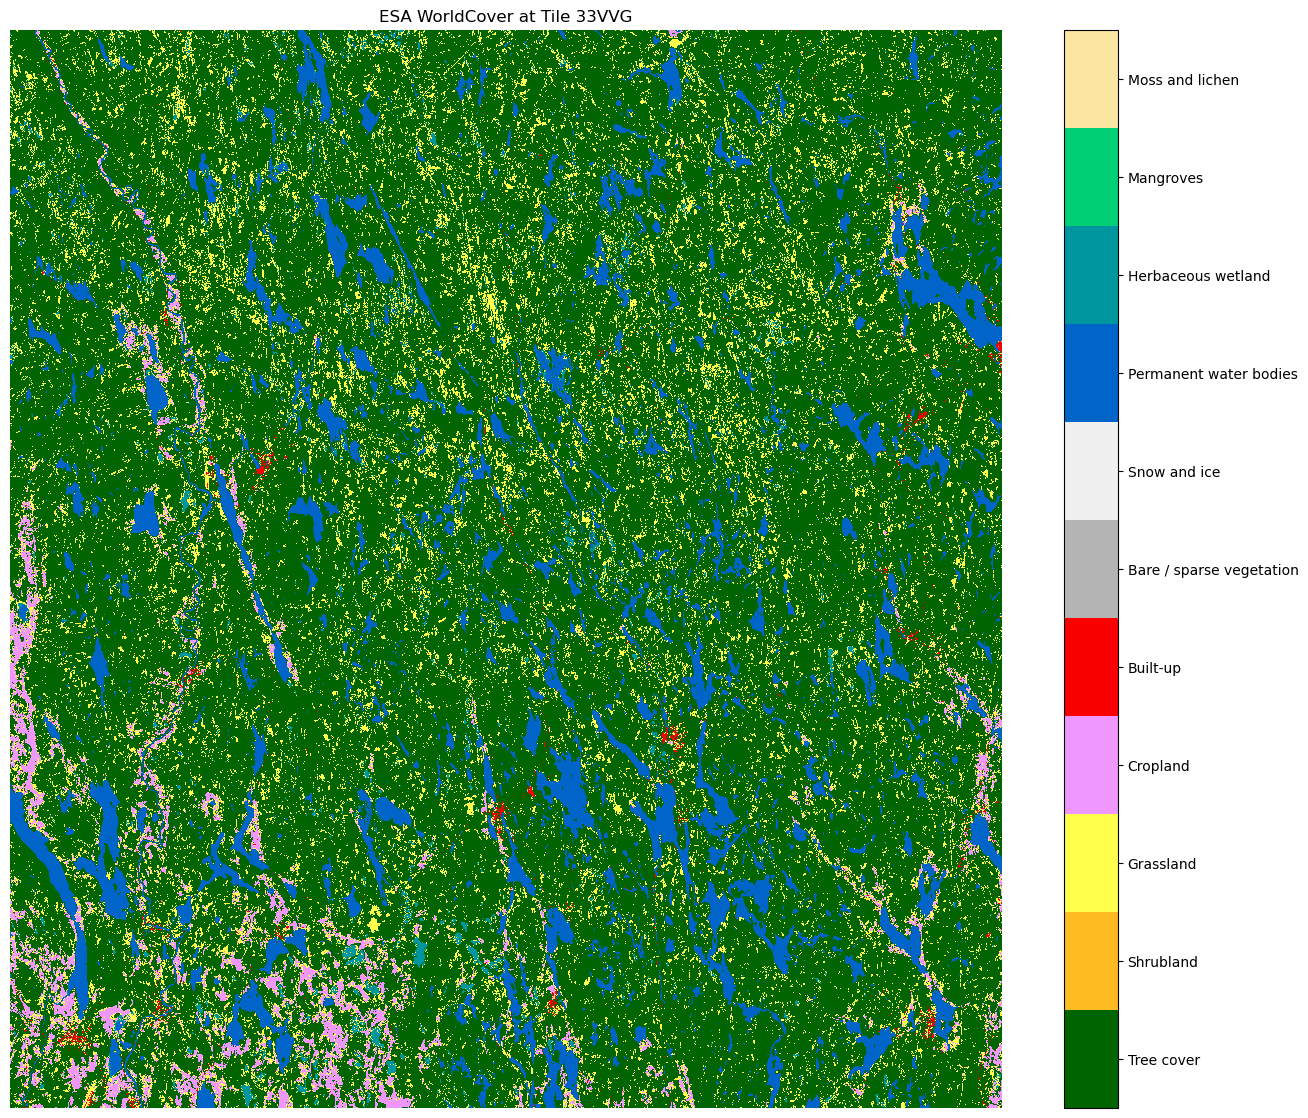

In [47]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors

fig, ax = plt.subplots(figsize=(16, 14))
normalizer = matplotlib.colors.Normalize(vmin=0, vmax=255)

map_data.isel().plot(ax=ax, cmap=cmap, norm=normalizer)

colorbar = fig.colorbar(
    cm.ScalarMappable(norm=normalizer, cmap=cmap),
    boundaries=boundaries,
    values=values,
    cax=fig.axes[1].axes,
)
colorbar.set_ticks(ticks, labels=tick_labels)

ax.set_axis_off()
ax.set_title("ESA WorldCover at Tile 33VVG");

In [ ]:
import odc.stac
import pystac_client
import planetary_computer

LstTileNms = []

TreeCover10 = []
Shrubland20 = []
Grassland30 = []
Cropland40 = []
Built_Up50 = []
BareSparseVegetation60 = []
SnowIce70 = []
PermanentWaterBodies80 = []
HerbaceousWetland90 = []
Mangroves95 = []
MossLichen100 = []

In [101]:
for dirname10 in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\en21ds_full\iid_test_split\target"):
    string10 = os.path.basename(dirname10)

    if string10 not in LstTileNms:

        bound1 = df[df['name'] == string10]['geometry'].bounds

        bbox_of_interest = [bound1.iloc[0][0].round(3), bound1.iloc[0][1].round(3), bound1.iloc[0][2].round(3), bound1.iloc[0][3].round(3)]

        catalog = pystac_client.Client.open(
            "https://planetarycomputer.microsoft.com/api/stac/v1",
            modifier=planetary_computer.sign_inplace,
        )

        search = catalog.search(
            collections=["esa-worldcover"],
            bbox=bbox_of_interest,
        )

        items = list(search.get_items())

        ds = odc.stac.load(items, crs="EPSG:4326", resolution=0.0001, bbox=bbox_of_interest)
        map_data = ds["map"].isel(time=-1).load()

        Map_DF = map_data.to_dataframe()

        TreeCover10.append(100*len(Map_DF[Map_DF['map'] == 10]['map'])/len(Map_DF['map']))
        Shrubland20.append(100*len(Map_DF[Map_DF['map'] == 20]['map'])/len(Map_DF['map']))
        Grassland30.append(100*len(Map_DF[Map_DF['map'] == 30]['map'])/len(Map_DF['map']))
        Cropland40.append(100*len(Map_DF[Map_DF['map'] == 40]['map'])/len(Map_DF['map']))
        Built_Up50.append(100*len(Map_DF[Map_DF['map'] == 50]['map'])/len(Map_DF['map']))
        BareSparseVegetation60.append(100*len(Map_DF[Map_DF['map'] == 60]['map'])/len(Map_DF['map']))
        SnowIce70.append(100*len(Map_DF[Map_DF['map'] == 70]['map'])/len(Map_DF['map']))
        PermanentWaterBodies80.append(100*len(Map_DF[Map_DF['map'] == 80]['map'])/len(Map_DF['map']))
        HerbaceousWetland90.append(100*len(Map_DF[Map_DF['map'] == 90]['map'])/len(Map_DF['map']))
        Mangroves95.append(100*len(Map_DF[Map_DF['map'] == 95]['map'])/len(Map_DF['map']))
        MossLichen100.append(100*len(Map_DF[Map_DF['map'] == 100]['map'])/len(Map_DF['map']))
        
        LstTileNms.append(string10)

        print("Calculated landcover percentages for frame:", string10)



Calculated landcover percentages for frame: 32UNU
Calculated landcover percentages for frame: 32UPC
Calculated landcover percentages for frame: 32UQC
Calculated landcover percentages for frame: 32VMM
Calculated landcover percentages for frame: 32VPP
Calculated landcover percentages for frame: 33SXD
Calculated landcover percentages for frame: 33TUN
Calculated landcover percentages for frame: 33TVF
Calculated landcover percentages for frame: 33TWE
Calculated landcover percentages for frame: 33TXJ
Calculated landcover percentages for frame: 33TXN
Calculated landcover percentages for frame: 33TYM
Calculated landcover percentages for frame: 33TYN
Calculated landcover percentages for frame: 33UVR
Calculated landcover percentages for frame: 33UWT
Calculated landcover percentages for frame: 33UXP
Calculated landcover percentages for frame: 33UXQ
Calculated landcover percentages for frame: 33VUE
Calculated landcover percentages for frame: 33VUF
Calculated landcover percentages for frame: 33VUG


In [103]:
df10 = pd.DataFrame()

df10['Tile'] = LstTileNms

df10['TreeCover10'] = TreeCover10
df10['Shrubland20'] = Shrubland20
df10['Grassland30'] = Grassland30
df10['Cropland40'] = Cropland40
df10['Built_Up50'] = Built_Up50
df10['BareSparseVegetation60'] = BareSparseVegetation60
df10['SnowIce70'] = SnowIce70
df10['PermanentWaterBodies80'] = PermanentWaterBodies80
df10['HerbaceousWetland90'] = HerbaceousWetland90
df10['Mangroves95'] = Mangroves95
df10['MossLichen100'] = MossLichen100

df10

Tile  TreeCover10  Shrubland20  Grassland30  Cropland40  Built_Up50   
0   29SND    40.811573     4.735008    41.185991    8.651805    2.505658  \
1   29SPC    29.314501     4.094252    51.088392   12.270765    0.844943   
2   29SQB    26.467075     9.261728    25.103197   27.822201    2.552047   
3   29TNE    56.278707     5.040070    22.049932    2.427202    4.037286   
4   29TPE    34.806291     6.842817    51.944620    3.961906    1.346715   
..    ...          ...          ...          ...         ...         ...   
77  34TFN    61.136220     0.002192    25.139568   10.758980    2.297865   
78  34TFP    36.418511     0.006584    17.888700   42.375791    1.488413   
79  34TFT    42.121259     0.040239    31.540875   24.054544    1.813492   
80  34VCL    19.037575     0.000015     4.064242    1.301910    1.952660   
81  34VFQ    75.330358     0.000126     8.602371    7.271738    0.454699   

    BareSparseVegetation60  SnowIce70  PermanentWaterBodies80   
0                 0.238687        0.0                1.705982  \
1                 0.139919        0.0                2.247221   
2                 1.744111        0.0                4.094376   
3                 0.368229        0.0                9.595668   
4                 0.129534        0.0                0.968095   
..                     ...        ...                     ...   
77                0.125278        0.0                0.505924   
78                0.033566        0.0                1.537620   
79                0.067595        0.0                0.313048   
80                0.080105        0.0               53.581725   
81                0.037893        0.0                7.266263   

    HerbaceousWetland90  Mangroves95  MossLichen100  
0              0.165295          0.0       0.000000  
1              0.000007          0.0       0.000000  
2              2.955265          0.0       0.000000  
3              0.202907          0.0       0.000000  
4              0.000022          0.0       0.000000  
..                  ...          ...            ...  
77             0.033936          0.0       0.000037  
78             0.250815          0.0       0.000000  
79             0.048947          0.0       0.000000  
80             0.220134          0.0       0.000000  
81             1.034901          0.0       0.001651  

[82 rows x 12 columns]

In [117]:
scoretile = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TilesMeanVarScore.csv")
scoretile['ENS Tile']
stdtile = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\AverageSTDperTile.csv")
stdtile['Average STD']

0     0.043149
1     0.043741
2     0.032885
3     0.051030
4     0.041288
        ...   
77    0.059276
78    0.036200
79    0.037579
80    0.051048
81    0.062292
Name: Average STD, Length: 82, dtype: float64

In [124]:
df10['ENS score'] = scoretile['ENS Tile']
df10['Average STD'] = stdtile['Average STD']
df10

Tile  TreeCover10  Shrubland20  Grassland30  Cropland40  Built_Up50   
0   29SND    40.811573     4.735008    41.185991    8.651805    2.505658  \
1   29SPC    29.314501     4.094252    51.088392   12.270765    0.844943   
2   29SQB    26.467075     9.261728    25.103197   27.822201    2.552047   
3   29TNE    56.278707     5.040070    22.049932    2.427202    4.037286   
4   29TPE    34.806291     6.842817    51.944620    3.961906    1.346715   
..    ...          ...          ...          ...         ...         ...   
77  34TFN    61.136220     0.002192    25.139568   10.758980    2.297865   
78  34TFP    36.418511     0.006584    17.888700   42.375791    1.488413   
79  34TFT    42.121259     0.040239    31.540875   24.054544    1.813492   
80  34VCL    19.037575     0.000015     4.064242    1.301910    1.952660   
81  34VFQ    75.330358     0.000126     8.602371    7.271738    0.454699   

    BareSparseVegetation60  SnowIce70  PermanentWaterBodies80   
0                 0.238687        0.0                1.705982  \
1                 0.139919        0.0                2.247221   
2                 1.744111        0.0                4.094376   
3                 0.368229        0.0                9.595668   
4                 0.129534        0.0                0.968095   
..                     ...        ...                     ...   
77                0.125278        0.0                0.505924   
78                0.033566        0.0                1.537620   
79                0.067595        0.0                0.313048   
80                0.080105        0.0               53.581725   
81                0.037893        0.0                7.266263   

    HerbaceousWetland90  Mangroves95  MossLichen100  ENS score  Average STD   
0              0.165295          0.0       0.000000   0.340795     0.043149  \
1              0.000007          0.0       0.000000   0.332422     0.043741   
2              2.955265          0.0       0.000000   0.348964     0.032885   
3              0.202907          0.0       0.000000   0.337786     0.051030   
4              0.000022          0.0       0.000000   0.296357     0.041288   
..                  ...          ...            ...        ...          ...   
77             0.033936          0.0       0.000037   0.307024     0.059276   
78             0.250815          0.0       0.000000   0.355789     0.036200   
79             0.048947          0.0       0.000000   0.334221     0.037579   
80             0.220134          0.0       0.000000   0.339920     0.051048   
81             1.034901          0.0       0.001651   0.358689     0.062292   

   ENSTile  
0    29SND  
1    29SPC  
2    29SQB  
3    29TNE  
4    29TPE  
..     ...  
77   34TFN  
78   34TFP  
79   34TFT  
80   34VCL  
81   34VFQ  

[82 rows x 15 columns]

In [122]:
outputper = r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\LandCoverPercentages.csv"
df10.to_csv(outputper)

In [120]:
df10.round(2)

Tile  TreeCover10  Shrubland20  Grassland30  Cropland40  Built_Up50   
0   29SND        40.81         4.74        41.19        8.65        2.51  \
1   29SPC        29.31         4.09        51.09       12.27        0.84   
2   29SQB        26.47         9.26        25.10       27.82        2.55   
3   29TNE        56.28         5.04        22.05        2.43        4.04   
4   29TPE        34.81         6.84        51.94        3.96        1.35   
..    ...          ...          ...          ...         ...         ...   
77  34TFN        61.14         0.00        25.14       10.76        2.30   
78  34TFP        36.42         0.01        17.89       42.38        1.49   
79  34TFT        42.12         0.04        31.54       24.05        1.81   
80  34VCL        19.04         0.00         4.06        1.30        1.95   
81  34VFQ        75.33         0.00         8.60        7.27        0.45   

    BareSparseVegetation60  SnowIce70  PermanentWaterBodies80   
0                     0.24        0.0                    1.71  \
1                     0.14        0.0                    2.25   
2                     1.74        0.0                    4.09   
3                     0.37        0.0                    9.60   
4                     0.13        0.0                    0.97   
..                     ...        ...                     ...   
77                    0.13        0.0                    0.51   
78                    0.03        0.0                    1.54   
79                    0.07        0.0                    0.31   
80                    0.08        0.0                   53.58   
81                    0.04        0.0                    7.27   

    HerbaceousWetland90  Mangroves95  MossLichen100  ENS score  Average STD  
0                  0.17          0.0            0.0       0.34         0.04  
1                  0.00          0.0            0.0       0.33         0.04  
2                  2.96          0.0            0.0       0.35         0.03  
3                  0.20          0.0            0.0       0.34         0.05  
4                  0.00          0.0            0.0       0.30         0.04  
..                  ...          ...            ...        ...          ...  
77                 0.03          0.0            0.0       0.31         0.06  
78                 0.25          0.0            0.0       0.36         0.04  
79                 0.05          0.0            0.0       0.33         0.04  
80                 0.22          0.0            0.0       0.34         0.05  
81                 1.03          0.0            0.0       0.36         0.06  

[82 rows x 14 columns]

<Figure size 1600x1200 with 0 Axes>

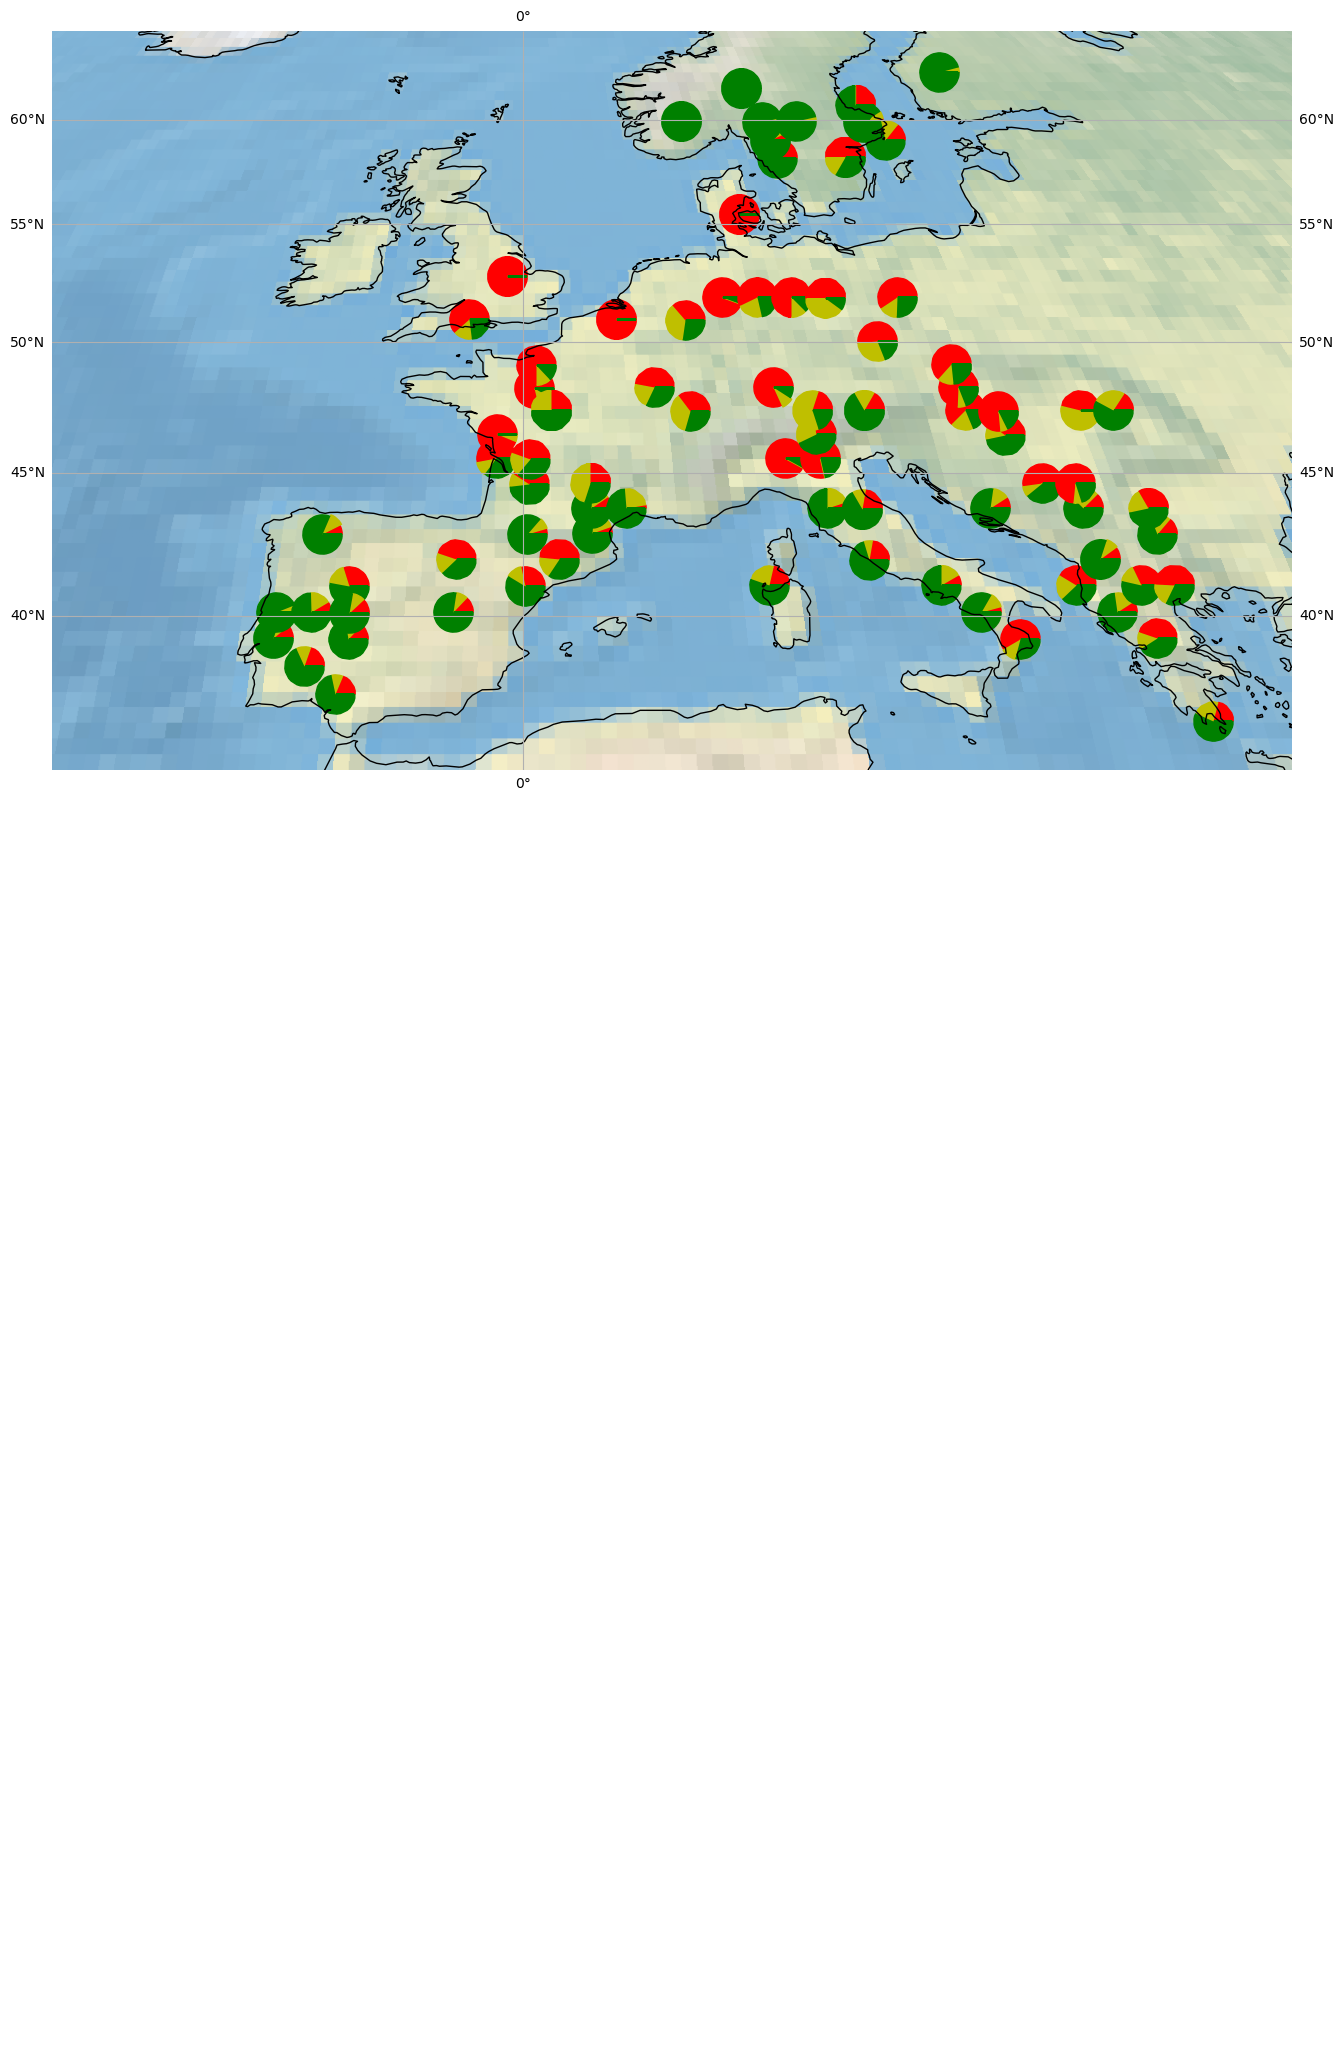

In [114]:
from matplotlib import colors
from matplotlib import cm
import matplotlib as matplotlib

plt.figure()

extent = [-15, 25, 35, 65]
piecolors=['r','y','g']

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic()})

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29\iid_test_split"):
    
    string = os.path.basename(dirname)
    TScore =  TileScores_DF[TileScores_DF['Tile'] == string]['Rounded_Scores'].item()

    BoundingValues = df[df['name'] == string]['geometry'].bounds
    wedges = plt.pie(DFfinalPercentages.loc[DFfinalPercentages['TileName'] == string].iloc[0][1:])

    for j in range(3):
        ax.scatter((BoundingValues.iloc[0][0]+BoundingValues.iloc[0][2])/2,(BoundingValues.iloc[0][1]+BoundingValues.iloc[0][3])/2,
                   marker=(wedges[0][j].get_path().vertices.tolist()),facecolor=piecolors[j], s=800,transform=ccrs.Geodetic())
        
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)
ax.stock_img()
ax.background_img(name='BlueMarble',resolution='high')


In [17]:
SSIMScores = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileSSIMScore.csv")
SSIMScores

Unnamed: 0   Tile      SSIM
0            0  29SND  0.627303
1            1  29SPC  0.641249
2            2  29SQB  0.662107
3            3  30STJ  0.612475
4            4  33SXD  0.409182
..         ...    ...       ...
77          77  33VWE  0.491558
78          78  33VXG  0.657960
79          79  33VXH  0.532440
80          80  34VCL  0.650032
81          81  34VFQ  0.662524

[82 rows x 3 columns]

In [18]:
DeviationPerTile = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\AverageSTDperTile.csv")
DeviationPerTile

Unnamed: 0  Tiles  Average STD
0            0  29SND     0.043149
1            1  29SPC     0.043741
2            2  29SQB     0.032885
3            3  29TNE     0.051030
4            4  29TPE     0.041288
..         ...    ...          ...
77          77  34TFN     0.059276
78          78  34TFP     0.036200
79          79  34TFT     0.037579
80          80  34VCL     0.051048
81          81  34VFQ     0.062292

[82 rows x 3 columns]

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19436\3907314027.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19436\3907314027.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19436\3907314027.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local

<Figure size 1600x1200 with 0 Axes>

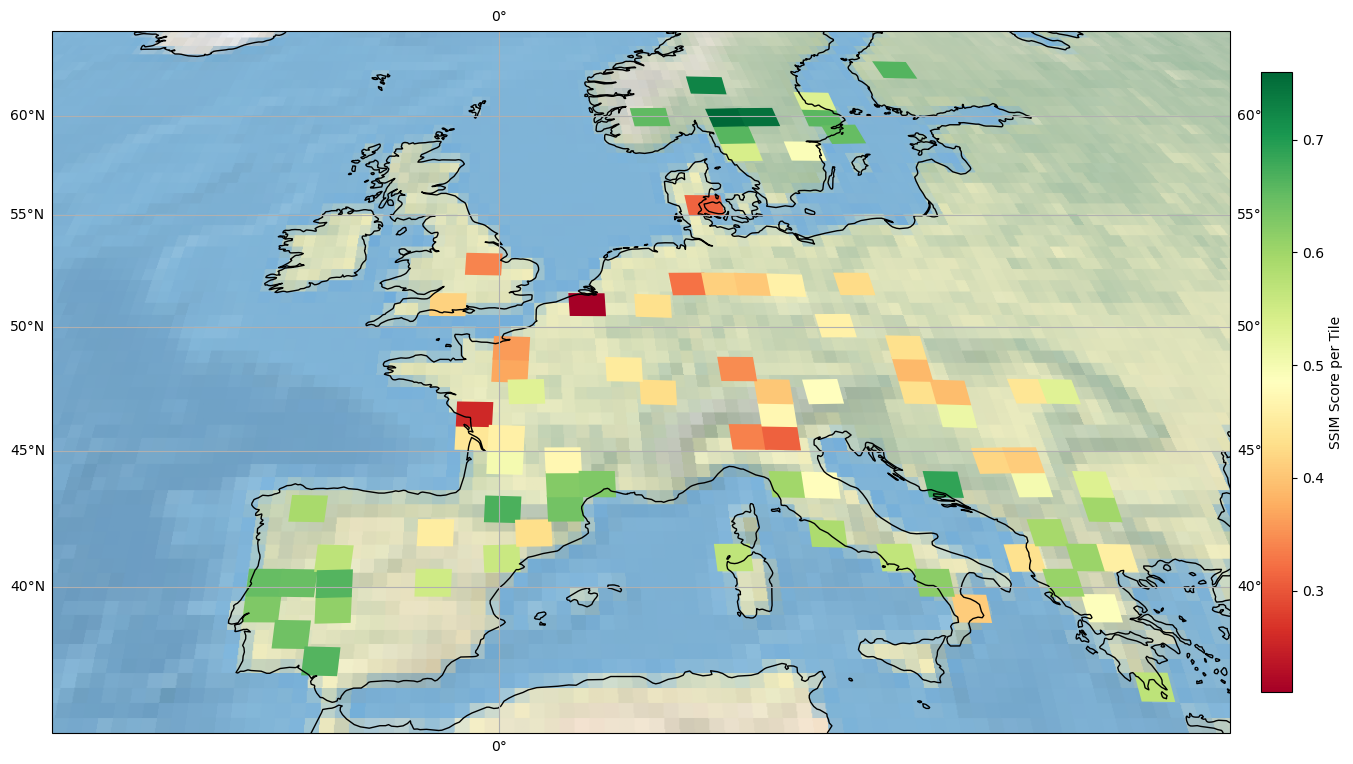

In [24]:
from matplotlib import colors
from matplotlib import cm
import matplotlib as matplotlib

def color_map_color(value, cmap_name='RdYlGn', vmin=SSIMScores['SSIM'].min().round(2), vmax=SSIMScores['SSIM'].max().round(2)):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

plt.figure()

extent = [-15, 25, 35, 65]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic()})
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=SSIMScores['SSIM'].min().round(2), vmax=SSIMScores['SSIM'].max().round(2)),
                               cmap='RdYlGn'),ax=ax,fraction=0.025, pad=0.025).set_label('SSIM Score per Tile')
ax.set_extent(extent)

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29\iid_test_split"):
    
    string = os.path.basename(dirname)
    TScore1 =  SSIMScores[SSIMScores['Tile'] == string]['SSIM'].item()

    df[df['name'] == string].plot(ax=ax, markersize=1,color=color_map_color(TScore1),transform=ccrs.Geodetic())
        

ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)
ax.stock_img()

C:\Users\jeroe\AppData\Local\Temp\ipykernel_7588\748921850.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\ipykernel_7588\748921850.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\ipykernel_7588\748921850.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG
C:\Users\jeroe\AppData\Local\Temp\

<Figure size 1600x1200 with 0 Axes>

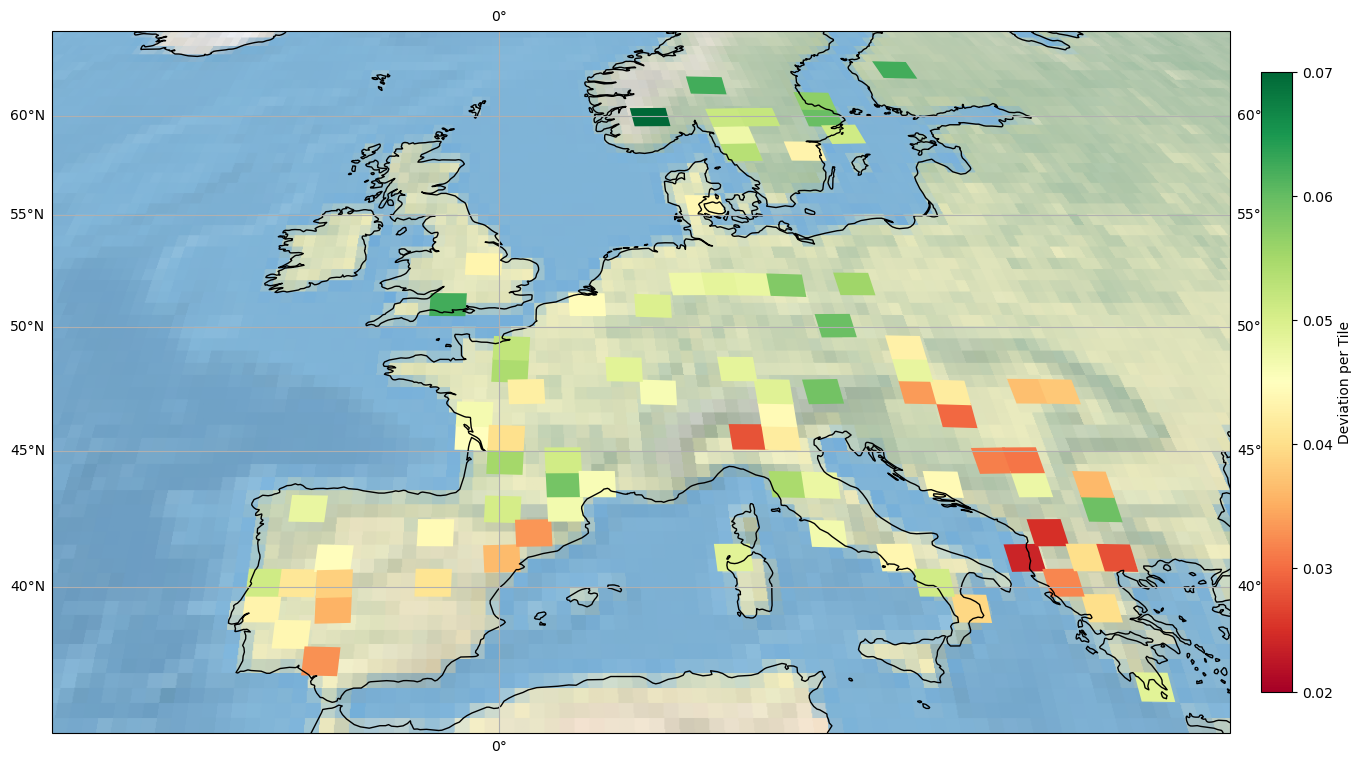

In [20]:
from matplotlib import colors
from matplotlib import cm
import matplotlib as matplotlib

def color_map_color(value, cmap_name='RdYlGn', vmin=DeviationPerTile['Average STD'].min().round(2), vmax=DeviationPerTile['Average STD'].max().round(2)):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

plt.figure()

extent = [-15, 25, 35, 65]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic()})
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=DeviationPerTile['Average STD'].min().round(2), vmax=DeviationPerTile['Average STD'].max().round(2)),
                               cmap='RdYlGn'),ax=ax,fraction=0.025, pad=0.025).set_label('Deviation per Tile')
ax.set_extent(extent)

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29\iid_test_split"):
    
    string = os.path.basename(dirname)
    TScore2 =  DeviationPerTile[DeviationPerTile['Tiles'] == string]['Average STD'].item()

    df[df['name'] == string].plot(ax=ax, markersize=1,color=color_map_color(TScore2),transform=ccrs.Geodetic())
        

ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)
ax.stock_img()

In [19]:
df11 = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\LandCoverPercentages.csv")
df11.loc[df11['Tile'] == string].iloc[0][2:13]

TreeCover10               75.330358
Shrubland20                0.000126
Grassland30                8.602371
Cropland40                 7.271738
Built_Up50                 0.454699
BareSparseVegetation60     0.037893
SnowIce70                       0.0
PermanentWaterBodies80     7.266263
HerbaceousWetland90        1.034901
Mangroves95                     0.0
MossLichen100              0.001651
Name: 81, dtype: object

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

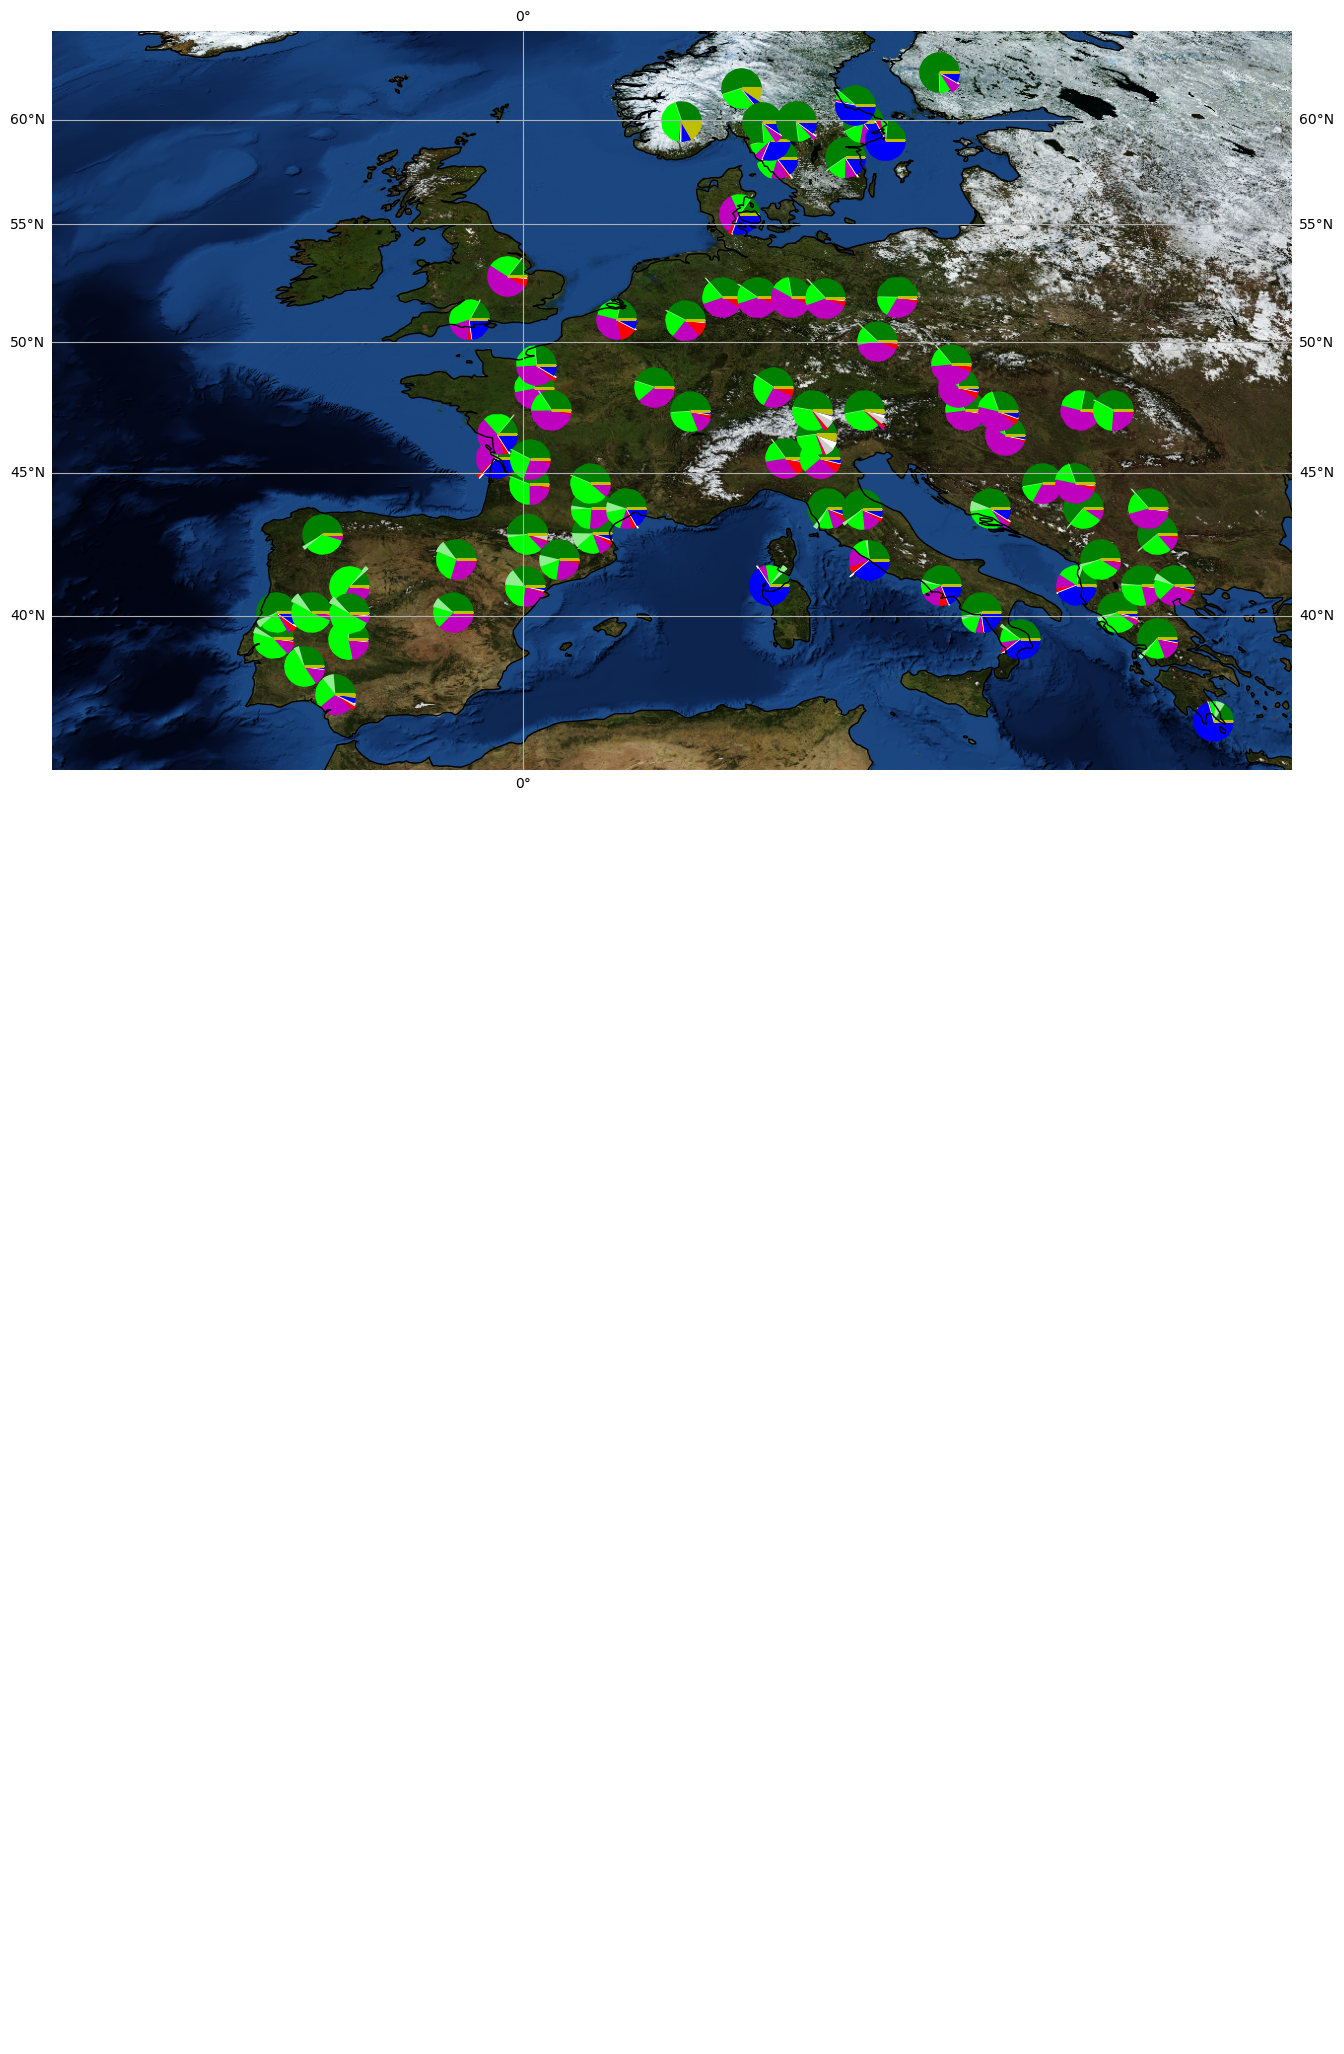

In [49]:
from matplotlib import colors
from matplotlib import cm
import matplotlib as matplotlib

from matplotlib.colors import LinearSegmentedColormap

cycles = 11
cmappy = LinearSegmentedColormap.from_list('defcol', ['green','lightgreen','lime','m','r','0.8','w','b','y','y','y'], N=cycles) 

extent = [-15, 25, 35, 65]
piecolors=['green','lightgreen','lime','m','r','0.8','w','b','y','y','y']


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic()})

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29\iid_test_split"):
    
    string = os.path.basename(dirname)
    TScore =  TileScores_DF[TileScores_DF['Tile'] == string]['Rounded_Scores'].item()

    BoundingValues = df[df['name'] == string]['geometry'].bounds
    wedges = plt.pie(df11.loc[df11['Tile'] == string].iloc[0][2:13])

    for j in range(11):
        ax.scatter((BoundingValues.iloc[0][0]+BoundingValues.iloc[0][2])/2,(BoundingValues.iloc[0][1]+BoundingValues.iloc[0][3])/2,
                   marker=(wedges[0][j].get_path().vertices.tolist()),facecolor=piecolors[j], s=800,transform=ccrs.Geodetic())
        
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)
ax.stock_img()
ax.background_img(name='BlueMarble',resolution='high')

plt.colorbar(orientation="vertical")
plt.imshow(cmap=cmappy)

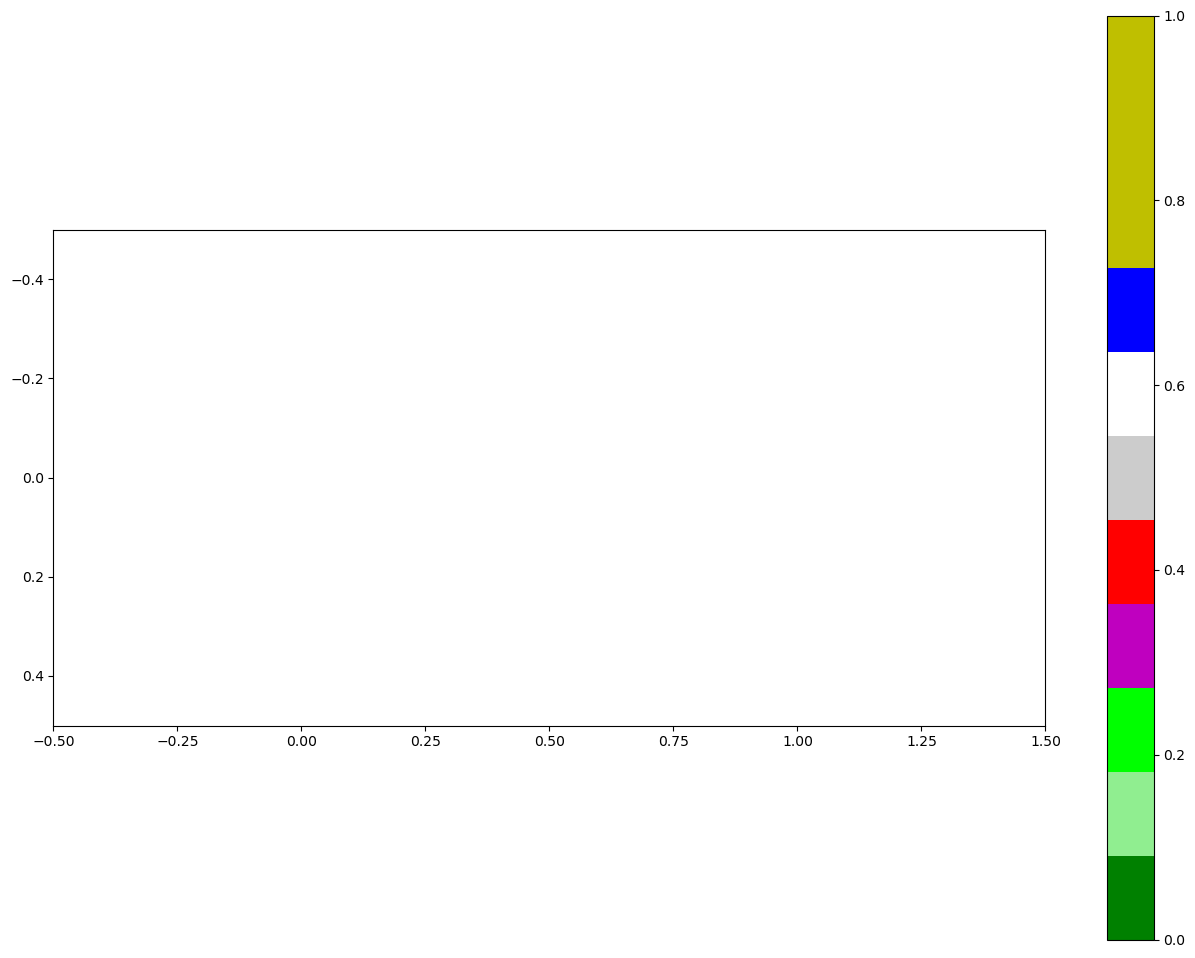

In [46]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
import numpy as np

cycles = 11
cmappy = LinearSegmentedColormap.from_list('defcol', ['green','lightgreen','lime','m','r','0.8','w','b','y','y','y'], N=cycles) 

# create dummy invisible image
# (use the colormap you want to have on the colorbar)
img = plt.imshow(np.array([[0,1]]), cmap=cmappy)
img.set_visible(False)

plt.colorbar(orientation="vertical",xtick=)

